In [2]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import random


In [3]:
tf.random.set_seed(42)


In [4]:
initializers = ["glorot_uniform", 
                keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), 
                keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05),
                keras.initializers.Zeros()]
initializer = initializers[0]

activations = ["relu", "softmax", "sigmoid", "tanh", "linear"]
activation = activations[0]

optimizers = ["sgd", "rmsprop", "adam", "adadelta"]
optimizer = optimizers[0]

regularizers = [None, keras.regularizers.L1(l1=0.01), keras.regularizers.L2(l2=0.01)]
regularizer = regularizers[0]

[9 0 0 ... 3 0 5]


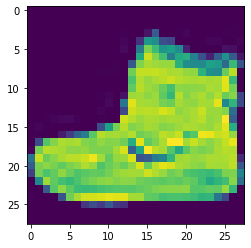

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full, X_test = X_train_full/255, X_test/255
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.imshow(X_train_full[0])
print(y_train_full)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
model.add(keras.layers.Dense(100, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=initializer, kernel_regularizer=regularizer))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [8]:
history = model.fit(X_train_full, y_train_full, epochs=4, batch_size=128)

Epoch 1/4
469/469 [==============================] - 4s 7ms/step - loss: 1.0654 - accuracy: 0.6801
Epoch 2/4
469/469 [==============================] - 3s 7ms/step - loss: 0.6246 - accuracy: 0.7941
Epoch 3/4
469/469 [==============================] - 3s 7ms/step - loss: 0.5426 - accuracy: 0.8188
Epoch 4/4
469/469 [==============================] - 3s 7ms/step - loss: 0.5023 - accuracy: 0.8305


In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5201 - accuracy: 0.8178


[0.5200909376144409, 0.817799985408783]

In [10]:
def doedingen(Activation, Initializer, Regularizer, Optimizer):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  model.add(keras.layers.Dense(300, activation=Activation, kernel_initializer=Initializer, kernel_regularizer=Regularizer))
  model.add(keras.layers.Dense(100, activation=Activation, kernel_initializer=Initializer, kernel_regularizer=Regularizer))
  model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=Initializer, kernel_regularizer=Regularizer))
  model.summary()
  model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Optimizer,
    metrics=["accuracy"]
  )
  history = model.fit(X_train_full, y_train_full, epochs=4, batch_size=128)
  model.evaluate(X_test, y_test)
  return round(model.evaluate(X_test, y_test)[1], 4) 



In [17]:
answers = {}

params = [initializers, activations, optimizers, regularizers]
paramnames = ["initializers", "activations", "optimizers", "regularizers"]
for i in range(len(params)):
  answers[paramnames[i]] = []
  Initializer = params[0][0]
  Activation = params[1][0]
  Optimizer = params[2][0]
  Regularizer = params[3][0]
  PARA = [Initializer, Activation, Optimizer, Regularizer]

  print(paramnames[i]) #print param name
  for j in range(len(params[i])):
    
    PARA[i] = params[i][j]
    print("\t",params[i][j], end="") #print parameter
    print("PARA: ",PARA)
    #print(params[i][j])
    #ans = doedingen(PARA[1], PARA[0], PARA[3], PARA[2])
    ans = 0
    #print("\n\nJE MOEDER: ",str(params[i][j]), ans)
    #answers[paramnames[i]].append(ans)
    answers[paramnames[i]].append(str(params[i][j])+" "+str(ans))

print("*****************************************")
for i in answers:
    print(i, answers[i])
print("*****************************************")

initializers
	 glorot_uniformPARA:  ['glorot_uniform', 'relu', 'sgd', None]
	 <keras.initializers.initializers_v2.RandomNormal object at 0x7f9c5e0aa510>PARA:  [<keras.initializers.initializers_v2.RandomNormal object at 0x7f9c5e0aa510>, 'relu', 'sgd', None]
	 <keras.initializers.initializers_v2.RandomUniform object at 0x7f9c5e0aa590>PARA:  [<keras.initializers.initializers_v2.RandomUniform object at 0x7f9c5e0aa590>, 'relu', 'sgd', None]
	 <keras.initializers.initializers_v2.TruncatedNormal object at 0x7f9c5e0aa610>PARA:  [<keras.initializers.initializers_v2.TruncatedNormal object at 0x7f9c5e0aa610>, 'relu', 'sgd', None]
	 <keras.initializers.initializers_v2.Zeros object at 0x7f9c5e0aa690>PARA:  [<keras.initializers.initializers_v2.Zeros object at 0x7f9c5e0aa690>, 'relu', 'sgd', None]
activations
	 reluPARA:  ['glorot_uniform', 'relu', 'sgd', None]
	 softmaxPARA:  ['glorot_uniform', 'softmax', 'sgd', None]
	 sigmoidPARA:  ['glorot_uniform', 'sigmoid', 'sgd', None]
	 tanhPARA:  ['glorot_u

In [12]:
for i in answers:
    print(i)
    for j in answers[i]:
      print("\t", j)

initializers
	 glorot_uniform 0
	 <keras.initializers.initializers_v2.RandomNormal object at 0x7f9c5e0aa510> 0
	 <keras.initializers.initializers_v2.RandomUniform object at 0x7f9c5e0aa590> 0
	 <keras.initializers.initializers_v2.TruncatedNormal object at 0x7f9c5e0aa610> 0
	 <keras.initializers.initializers_v2.Zeros object at 0x7f9c5e0aa690> 0
activations
	 relu 0
	 softmax 0
	 sigmoid 0
	 tanh 0
	 linear 0
optimizers
	 sgd 0
	 rmsprop 0
	 adam 0
	 adadelta 0
regularizers
	 None 0
	 <keras.regularizers.L1 object at 0x7f9c5e0aa6d0> 0
	 <keras.regularizers.L2 object at 0x7f9c5e0aa790> 0
